In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from utils.constants import SEASON
from utils.general import get_data_path

In [2]:
players_season_data = pd.read_csv(get_data_path(SEASON, 'players_season_data.csv'))
players_season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player_id              784 non-null    int64  
 1   web_name               784 non-null    object 
 2   team_id                784 non-null    int64  
 3   element_type           784 non-null    int64  
 4   points_per_game        784 non-null    float64
 5   total_points           784 non-null    int64  
 6   minutes                784 non-null    int64  
 7   starts                 784 non-null    int64  
 8   goals_scored           784 non-null    int64  
 9   assists                784 non-null    int64  
 10  yellow_cards           784 non-null    int64  
 11  red_cards              784 non-null    int64  
 12  clean_sheets           784 non-null    int64  
 13  goals_conceded         784 non-null    int64  
 14  saves                  784 non-null    int64  
 15  bps   

In [3]:
def scatter_with_lr(x, y, xlabel:str, ylabel:str, c = None, alpha:float=1.0):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.scatter(
        x,
        y,
        c=c,
        alpha=alpha,
    )

    # Linear regression fit
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')

    plt.legend()
    plt.show()

In [4]:
import statsmodels.api as sm

def scatter_with_loess(x, y, xlabel:str, ylabel:str, c = None, alpha:float=1.0, frac:float=0.66):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.scatter(
        x,
        y,
        c=c,
        alpha=alpha,
    )

    # LOESS curve
    lowess = sm.nonparametric.lowess
    
    # Sort points by x for plotting the LOESS curve correctly
    sorted_indices = np.argsort(x)
    loess_fit_sorted = lowess(y[sorted_indices], x[sorted_indices], frac=frac)


    plt.plot(loess_fit_sorted[:, 0], loess_fit_sorted[:, 1], color='red', label=f'LOESS (frac={frac})')

    plt.legend()
    plt.show()


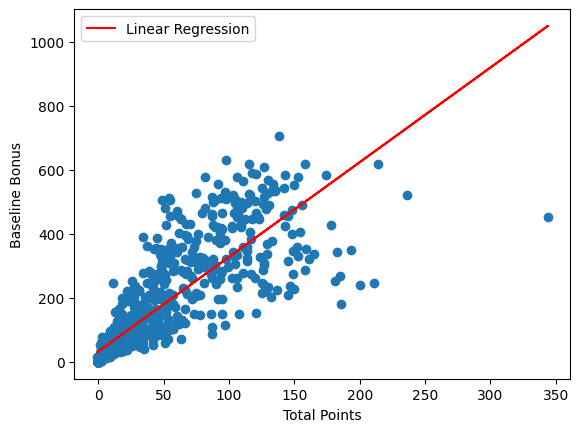

In [5]:
scatter_with_lr(
    players_season_data['total_points'],
    players_season_data['baseline_bps'],
    'Total Points',
    'Baseline Bonus',
)

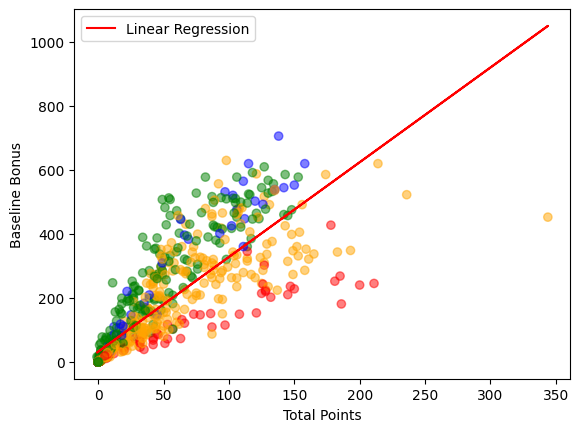

In [6]:
# Map positions to distinct colors
players_season_data['position'] = players_season_data['element_type'].apply(
    lambda x: 'Goalkeeper' if x == 1 else
              'Defender' if x == 2 else
              'Midfielder' if x == 3 else
              'Forward'
)

position_colors = {
    'Goalkeeper': 'blue',
    'Defender': 'green',
    'Midfielder': 'orange',
    'Forward': 'red'
}
colors = players_season_data['position'].map(position_colors)

scatter_with_lr(
    players_season_data['total_points'],
    players_season_data['baseline_bps'],
    'Total Points',
    'Baseline Bonus',
    c=colors,
    alpha=0.5
)

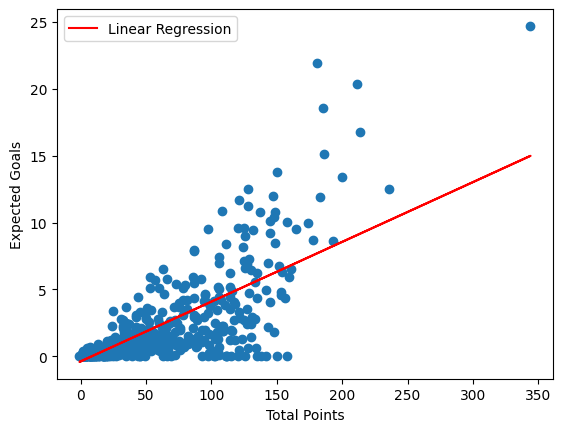

In [7]:
scatter_with_lr(
    players_season_data['total_points'],
    players_season_data['xG'],
    'Total Points',
    'Expected Goals',
)

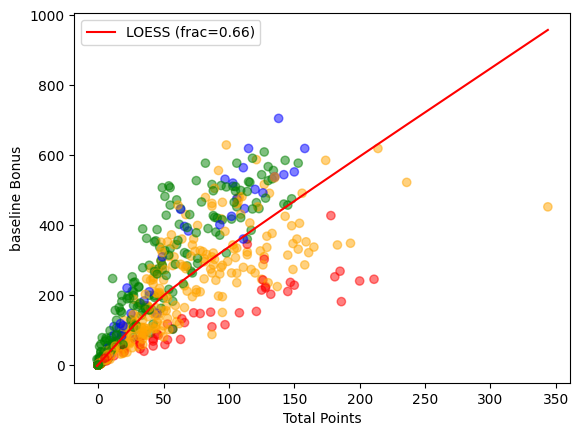

In [8]:
scatter_with_loess(
    players_season_data['total_points'],
    players_season_data['baseline_bps'],
    'Total Points',
    'baseline Bonus',
    c=colors,
    alpha=0.5,
)

<Axes: >

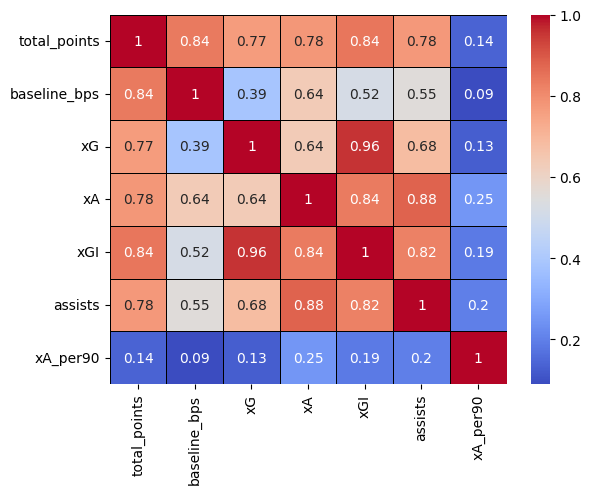

In [9]:
# Correlation heatmap
numerical_season = players_season_data.select_dtypes(include=[np.number])
numerical_season = numerical_season[['total_points', 'baseline_bps', 'xG', 'xA', 'xGI', 'assists', 'xA_per90']]
sns.heatmap(
    numerical_season.corr(),
    annot=True,
    cbar=True,
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='black',
)


# Lag feautures 

In [16]:
df = pd.read_csv("final_df.csv")
[col for col in df.columns]

['player_id',
 'gw',
 'team_id',
 'opponent_team_id',
 'was_home',
 'total_points',
 'minutes_last_3',
 'goals_scored_last_3',
 'assists_last_3',
 'goals_conceded_last_3',
 'clean_sheets_last_3',
 'xG_last_3',
 'xA_last_3',
 'xGC_last_3',
 'xGI_last_3',
 'total_points_last_3',
 'cc_last_3',
 'npg_last_3',
 'npxG_last_3',
 'npxgi_last_3',
 'shots_last_3',
 'SiB_last_3',
 'SoT_last_3',
 'tpa_last_3',
 'key_passes_last_3',
 'total_pass_completion_percentage_last_3',
 'minutes_last_5',
 'goals_scored_last_5',
 'assists_last_5',
 'goals_conceded_last_5',
 'clean_sheets_last_5',
 'xG_last_5',
 'xA_last_5',
 'xGC_last_5',
 'xGI_last_5',
 'total_points_last_5',
 'cc_last_5',
 'npg_last_5',
 'npxG_last_5',
 'npxgi_last_5',
 'shots_last_5',
 'SiB_last_5',
 'SoT_last_5',
 'tpa_last_5',
 'key_passes_last_5',
 'total_pass_completion_percentage_last_5',
 'minutes_last_10',
 'goals_scored_last_10',
 'assists_last_10',
 'goals_conceded_last_10',
 'clean_sheets_last_10',
 'xG_last_10',
 'xA_last_10',
 

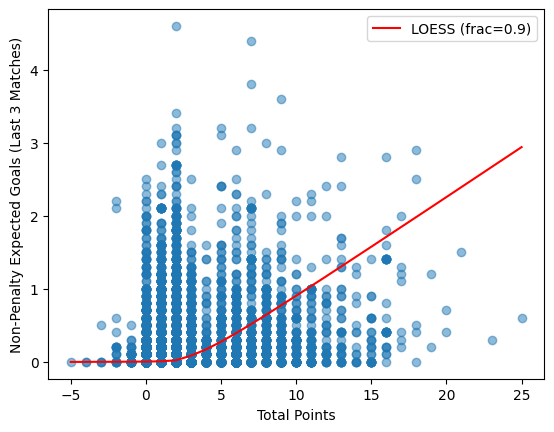

In [27]:
scatter_with_loess(
    df['total_points'],
    df['npxG_last_3'],
    'Total Points',
    'Non-Penalty Expected Goals (Last 3 Matches)',
    alpha=0.5,
    frac=0.9
)